# Naive Bayes Model in Python

We will start our strategy by first importing the libraries and the dataset.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from sklearn.naive_bayes import BernoulliNB

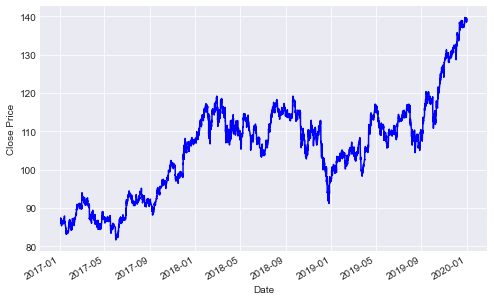

In [2]:
# The data is stored in the directory 'data_modules'
path = "../data_modules/"

# Read the data
data = pd.read_csv(path + 'JPM_2017_2019.csv', index_col=0)
data.index = pd.to_datetime(data.index)

data.close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

We will calculate the indicators as well as their signal values.

In [3]:
import sys
sys.path.append("..")

from data_modules.utility import get_target_features
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], \
                                   y[:split], y[split:]

And now we use the Bernoulli Naive Bayes model for binomial analysis.

In [4]:
model = BernoulliNB().fit(X_train, y_train)
# Fit the model on train dataset
model.fit(X_train, y_train)
predicted = model.predict(X_test)

How was the accuracy of our model? Let’s find out.

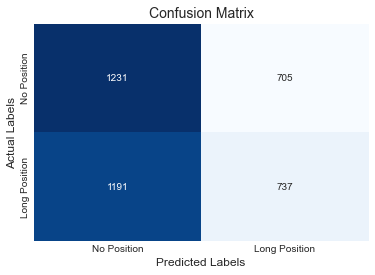

              precision    recall  f1-score   support

           0       0.51      0.64      0.56      1936
           1       0.51      0.38      0.44      1928

    accuracy                           0.51      3864
   macro avg       0.51      0.51      0.50      3864
weighted avg       0.51      0.51      0.50      3864



In [5]:
from data_modules.utility import get_metrics
get_metrics(y_test, predicted)

In [6]:
# Calculate the percentage change
strategy_data = X_test[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = \
    strategy_data['predicted_signal'].shift(1) * \
    strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

,pct_change,predicted_signal,strategy_returns
2019-05-28 12:15:00+00:00,0.000732,0,0.000732
2019-05-28 12:30:00+00:00,-0.000366,0,-0.000000
2019-05-28 12:45:00+00:00,0.000366,0,0.000000
2019-05-28 13:00:00+00:00,0.000091,0,0.000000
2019-05-28 13:15:00+00:00,-0.000091,1,-0.000000


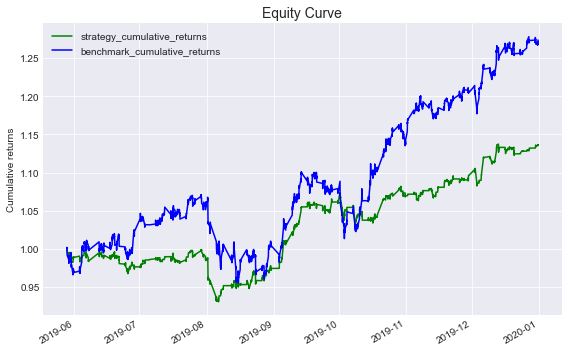

The maximum drawdown is -7.04%.


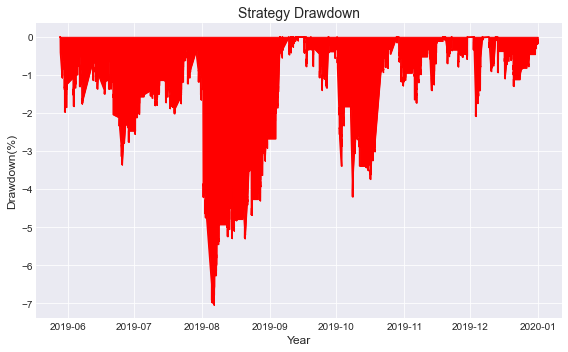

The Sharpe ratio is 1.91.


In [7]:
from data_modules.utility import get_performance
get_performance(strategy_data)

There is obviously room for improvement here, but this was just a demonstration of how a Naive Bayes model works. But are there special occasions when the model should be used? Let's find out in the next section.

#### Advantages of the Naive Bayes Model

- The main advantage of the Naive Bayes model is its simplicity and fast computation time. This is mainly due to its strong assumption that all events are independent of each other.
- They can work on limited data as well.
- Their fast computation is leveraged in real-time analysis when quick responses are required.

Although this speed comes at a price. Let’s find out how in the next section.

#### Disadvantages of Naive Bayes Model

- Since Naive Bayes assumes that all events are independent of each other, it cannot compute the relationship between the two events
- The Naive Bayes Model is fast but it comes at the cost of accuracy. Naive Bayes is sometimes called a bad estimator.
- The equation for Naive Bayes shows that we are multiplying the various probabilities. Thus, if one feature returned 0 probability, it could turn the whole result as 0. There are, however, various methods to overcome this instance. One of the more famous ones is called Laplace correction. In this method, the features are combined or the probability is set to 1 which ensures that we do not get zero probability.

#### Conclusion

The Naive Bayes model, despite the fact that it is naive, is pretty simple and effective in a large number of use cases in real life. While it is mostly used for text analysis, it has been used as a verification tool in the field of trading.

The Naive Bayes model can also be used as a stepping stone towards more precise and complex classification based machine learning models.